# Rotation curves - advanced

This task is to construct the baryonic mass distribution yourself. This is based of the paper here: https://arxiv.org/pdf/1208.5712.pdf

Note that this is not following the paper strictly as there are some simplifications made


## Task 1

For simplification, we only assume a bulge, disc, and stellar halo. 
Using the following equation, calculate the density profiles for each component
$\rho(r) = \rho_c \text{ exp}\left(-d_N \left[\left(\dfrac{r}{a_c}\right)^{N-1}-1\right]\right)$,
where <br/>
name $=[\text{bulge, disc, stellar component}]$, <br/>
$\rho_c = [9.201e-1, 1.307e-2, 4.459e-4]$, <br/>
$a_c = [1.055, 9.0, 11.22]$, <br/>
$d_N[7.769, 3.273, 8.669]$, <br/>
$N=[2.7, 1.2, 3.0]$

For a detailed explanation of each parameter, look at the paper (equation 2)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math

def density(r, a_c, N, rho_c, d_N):
    rho = []
    a = r
    for i in a:
        tempRho = rho_c* math.exp(-d_N * ((i/(a_c*1e3))**(N**-1)-1))
        rho.append(tempRho)
    return rho

a = np.arange(0., 60.0e3, 1.)
a_c = [1.055, 9.0, 11.22]
N = [2.7, 1.2, 3.0]
rho_c = [9.201e-1, 1.307e-2, 4.459e-4]
d_N = [7.769, 3.273, 8.669]


rho = []
for i in range(len(a_c)):
    trho = density(a, a_c[i], N[i], rho_c[i], d_N[i])
    rho.append(trho)

## Task 2

In this task, you should calculate the mass in each interval. M(0) = 0

The approach is similar to what you did for the dark matter profile in the other notebook

In [34]:
def mass(r, rho):
    massOut = [0]
    for i in range(len(rho)-1):
        tempMass = 4*math.pi*r[i+1]**2*rho[i]*(r[i+1]-r[i])#*1e10
        massOut.append(massOut[i]+tempMass)
    return massOut

masses = []
for i in rho:
    masses.append(mass(a, i))

## Task 3

Now calculate the orbital velocities for each component and plot it. This way, you can see how the different components contribute to the orbital velocities. 

Plot the complete rotation curve, which means you have to add the mass from each component in each element.

In [37]:
def orbVel(r, mass):
    G = 4.3e-3
    vel = [0]
    for i in range(len(r)-1):
        tempv = np.sqrt(G * mass[i]/r[i])
        vel.append(tempv)
    return vel

orbVels = []
for i in masses:
    orbVels.append(orbVel(a, i))

/Library/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


(0, 50000.0, 0, 262.92805953953297)

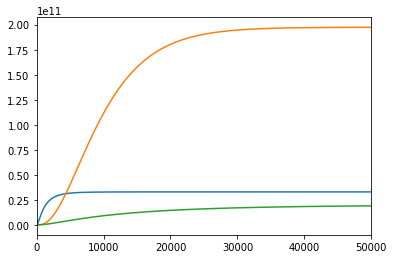

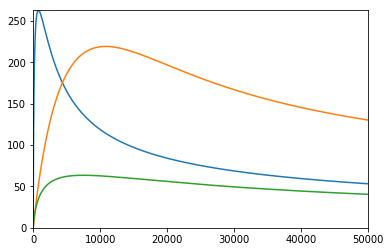

In [39]:
plt.figure()
for i in range(len(a_c)):
    plt.plot(a, masses[i])
plt.axis(xmin=0, xmax = 50e3)
plt.figure()
for i in range(len(a_c)):
    plt.plot(a, orbVels[i])
plt.axis(xmin=0, xmax = 50e3, ymin=0, ymax=max(orbVels[0]))

## Task 4
Time for you to experiment! Ideas for experimentation:

* Try changing the parameters ($\rho_c, a_c, N, d_N$) and see how it changes the distributions.
* Try adding more mass components and see how you can change the orbital velocity contributions.
* Try different distribution functions, e.g NFW